# Bike Sharing Scheme
## Scenario
As a junior data analyst working in the marketing analyst team at a bikeshare company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, the team wants to understand how casual riders and annual members use the bikes differently. From these insights, the team will design a new marketing strategy to convert casual riders into annual members.

## Ask
The business task is "How do annual members and casual riders use bikes differently?" 

Thinking back to the context, it is neccessary to always address how these differences could relate to converting casual riders to annual members and how the analysis undertaken could assist designing a sophisticated marketing strategy.

## Prepare   
For this case study, the data used is a historical dataset covering the past 12 months of "Divvy" trips.

## Process
The dataset contains 12 very large csv files. As a result, I have resorted to using Python as the in-built tools are more appropriate and would allow for analysis and cleaning to be done with minimal lines of code.

### Import the used libraries

In [1]:
import numpy as np
import pandas as pd
import os
import glob
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

### Load CSV files using glob

In [2]:
#Get the list of all the locations of the files
pwd = os.getcwd() + "/Cyclistic/"
files = glob.glob(pwd + "*.csv")

df = []

#Store and concat the data into the datafram
for i, f in enumerate(files):
    if i == 0:
        df=pd.read_csv(f)
    else:
        df = df.append(pd.read_csv(f))
df

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86.0,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.93220,-87.658600,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503.0,Kosciuszko Park,499.0,41.924400,-87.715400,41.93060,-87.723800,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142.0,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.86790,-87.623000,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216.0,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.89920,-87.672200,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125.0,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.96950,-87.654700,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
531628,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,13398,NaN,NaN,41.802581,-87.590230,41.80000,-87.600000,member
531629,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,TA1307000107,Michigan Ave & Oak St,13042,41.961670,-87.654640,41.90096,-87.623777,casual
531630,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961525,-87.654651,41.95000,-87.650000,member
531631,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,TA1307000107,NaN,NaN,41.961654,-87.654721,41.98000,-87.660000,member


### Begin Cleaning Process

In [3]:
#The value of station id for each station changes from the year of 2020 to 2021. Fixing this would be irrelevant to the analysis so these columns are dropped
df=df.drop(["start_station_id", "end_station_id"],axis=1)
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
end_station_name       object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [4]:
#It is noted that the data types for the dates are incorrect so these are fixed. Furthermore, there are trips that contain trips that end before they start - it is later revealed that this is infact due to a number of bikes being serviced at the "hubbard_test_lws" and only account for less than 0.5% of the total trips so dropping these fields would not influence the analysis. 

#Conversion of times from strings to datetime
df["started_at"]=pd.to_datetime(df["started_at"], format='%Y/%m/%d %H:%M:%S')
df["ended_at"]=pd.to_datetime(df["ended_at"], format='%Y/%m/%d %H:%M:%S')

#Drop bikes meeting criteria
df=df.drop(df[(df["start_station_name"]=="hubbard_test_lws")|(df["end_station_name"]=="hubbard_test_lws")].index)
df=df.drop(df[df["started_at"]>df["ended_at"]].index)
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
end_station_name              object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [5]:
#Data Types and columns are fixed
#Save
df_1 = df.copy()

**Note:** Electric bikes use a GPS feature to locate the lat and long position of the station instead of using the actual location of the station. To correct these values a new dataframe is made from the average of the station locations and a left join is used to correct the lat and long values

In [6]:
#Create DF including distinct locations, with lat and long as averages
station_locs=df_1[["start_station_name", "start_lat", "start_lng"]].groupby(by="start_station_name",dropna=True).mean().reset_index()
station_locs=station_locs.rename(columns={"start_station_name":"station","start_lat":"lat","start_lng":"long"})
station_locs.head(15)

,station,lat,long
0,2112 W Peterson Ave,41.991179,-87.683594
1,63rd St Beach,41.781026,-87.576114
2,900 W Harrison St,41.874757,-87.649806
3,Aberdeen St & Jackson Blvd,41.877727,-87.654797
4,Aberdeen St & Monroe St,41.880416,-87.655538
5,Aberdeen St & Randolph St,41.884116,-87.654271
6,Ada St & 113th St,41.687561,-87.655377
7,Ada St & Washington Blvd,41.882830,-87.661204
8,Adler Planetarium,41.866099,-87.607274
9,Albany Ave & 26th St,41.844486,-87.702018


In [7]:
#Left join to fix the lat and long values, filling NA values, dropping old columns and renaming new ones.
temp=pd.merge(left=df_1,right=station_locs,how='left',left_on="start_station_name",right_on="station") # Left Join
temp["lat"].fillna(temp["start_lat"],inplace=True) # Fill NA lat
temp["long"].fillna(temp["start_lng"],inplace=True) # Fill NA long
temp.drop(["start_lat","start_lng","station"],axis=1,inplace=True) # Drop
temp.rename(columns={"lat":"start_latitude","long":"start_longitude"}, inplace=True) # Rename

#Repeat the above step for the values of end station
temp=pd.merge(left=temp,right=station_locs,how='left',left_on="end_station_name",right_on="station")
temp["lat"].fillna(temp["end_lat"],inplace=True)
temp["long"].fillna(temp["end_lng"],inplace=True)
temp.drop(["end_lat","end_lng","station"],axis=1,inplace=True)
temp.rename(columns={"lat":"end_latitude","long":"end_longitude"}, inplace=True)

#Bikes also can be left undocked at a station, so fill NA values with "Undocked"
temp[["start_station_name","end_station_name"]]=temp[["start_station_name","end_station_name"]].fillna("Undocked")

#Finally, "docked_bikes" are older versions of the "classic_bike", for completeness, these are renamed 
temp[["start_station_name","end_station_name"]]=temp[["start_station_name","end_station_name"]].fillna("Undocked")
temp

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,member_casual,start_latitude,start_longitude,end_latitude,end_longitude
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,41.896382,-87.660993,41.932217,-87.658628
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,member,41.924395,-87.715428,41.930573,-87.723798
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,41.894518,-87.617949,41.867897,-87.623037
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,member,41.903023,-87.697485,41.899182,-87.672198
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,41.890177,-87.626196,41.969510,-87.654700
...,...,...,...,...,...,...,...,...,...,...,...
4273122,EF56D7D1D612AC11,electric_bike,2021-05-20 16:32:14,2021-05-20 16:35:39,Blackstone Ave & Hyde Park Blvd,Undocked,member,41.802564,-87.590359,41.800000,-87.600000
4273123,745191CB9F21DE3C,classic_bike,2021-05-29 16:40:37,2021-05-29 17:22:37,Sheridan Rd & Montrose Ave,Michigan Ave & Oak St,casual,41.961654,-87.654638,41.900968,-87.623767
4273124,428575BAA5356BFF,electric_bike,2021-05-31 14:24:54,2021-05-31 14:31:38,Sheridan Rd & Montrose Ave,Undocked,member,41.961654,-87.654638,41.950000,-87.650000
4273125,FC8A4A7AB7249662,electric_bike,2021-05-25 16:01:33,2021-05-25 16:07:37,Sheridan Rd & Montrose Ave,Undocked,member,41.961654,-87.654638,41.980000,-87.660000


Data is now cleaned


## Analyze
Firstly, it is needed to be understood as to why we are completing this task, best to way to do this is to visualise the breakdown of member types in the past 3 months.

In [8]:
#Firstly, find the trip duration in minutes, day of the week the trip occurs and the hour that the trip started at
temp["trip_duration"] = (temp["ended_at"]-temp["started_at"]).astype('timedelta64[m]').astype(int)
temp["day_of_week"] = temp["started_at"].dt.day_name()
temp["started_at_weekday"] = temp["started_at"].dt.weekday
temp["started_at_hour"] = temp["started_at"].dt.hour

#It is later noted that a negligble quantity of trips last in durations excess of 150 minutes, this is likely due to riders using the bikes incorrectly or broken bikes. Although, this is a interesting point of discussion and analyis to improve the overall experience, this is not relevant to the marketing campaign as the 99% of the population exist below 150minutes. Remove these fields.
temp=temp.loc[temp['trip_duration']<=150]

Text(0.5, 1.0, 'Member Type Break Down in the Past 3 Months')

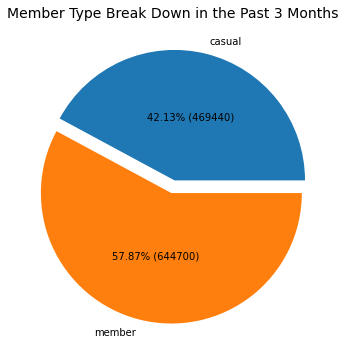

In [9]:
#Make observations on the membership type distribution over the past 3 months to determine whether there is room to grow
casual_member_count=temp[temp["started_at"]>pd.Timestamp(year=2021,month=2,day=1)][["member_casual","ride_id"]].groupby("member_casual").count().reset_index()
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(x=casual_member_count["ride_id"], labels=casual_member_count["member_casual"], autopct=lambda p: '{:.2f}% ({:.0f})'.format(p,p/100*casual_member_count["ride_id"].sum()), explode=[0.05]*2,pctdistance=0.5)
plt.title("Member Type Break Down in the Past 3 Months", fontsize=14)

Although the majority of rides are members, there is a significant portion of casual rides. Although this data doesnt include distinct rider ids, but rather rides, it is difficult to determine how many actual casual riders exist. But, it is assumed that these are related as more rides would likely mean more riders and therefore,there exists a potential growth in converting casual riders.

Moving on to behavioural trends, we first look at the stations with the greatest activity of casual riders.

To analyze difference in member vs casual rider behaviour, the daily and weekly behaviour of the different membership types (number of trips occuring, average duration of the trips) could be determined. This would allow the marketing strategy to be designed in a way that will target and increase the exposure to casual riders and likely, increase the conversion rate of casual members.

Furthermore, the marketing strategy will benefit by discovering the stations that have the greatest casual member activity.

In [10]:

# Find station activity aggregated over member type in the past 3 months by combining counts of end and start station.
last3monthsdf_start=temp[temp["started_at"]>pd.Timestamp(year=2021,month=2,day=1)][["start_station_name","member_casual","ride_id","start_latitude","start_longitude"]]
last3monthsdf_start.rename(columns={"start_station_name":"station","start_latitude":"lat","start_longitude":"lng"},inplace=True)
last3monthsdf_end=temp[temp["started_at"]>pd.Timestamp(year=2021,month=2,day=1)][["end_station_name","member_casual","ride_id",'end_latitude','end_longitude']]
last3monthsdf_end.rename(columns={"end_station_name":"station","end_latitude":"lat","end_longitude":"lng"},inplace=True)

# Union the tables
last3monthsdf_merged=pd.concat([last3monthsdf_start,last3monthsdf_end])

# Summarise the tables by aggregating count
last3months_summarised=last3monthsdf_merged[["station","member_casual","ride_id"]].groupby(["station","member_casual"]).aggregate('count').reset_index()
last3months_summarised


,station,member_casual,ride_id
0,2112 W Peterson Ave,casual,139
1,2112 W Peterson Ave,member,296
2,63rd St Beach,casual,787
3,63rd St Beach,member,372
4,900 W Harrison St,casual,846
...,...,...,...
1368,Woodlawn Ave & 75th St,member,10
1369,Woodlawn Ave & Lake Park Ave,casual,405
1370,Woodlawn Ave & Lake Park Ave,member,526
1371,Yates Blvd & 75th St,casual,89


Text(0.5, 1.0, 'Breakdown of 10 Most Popular Stations by Activity for Casual Members')

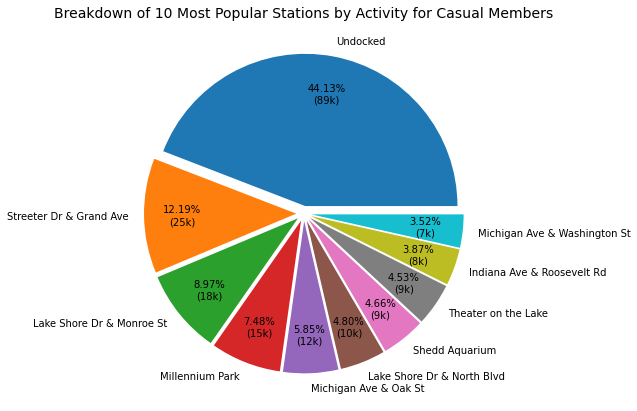

In [11]:
#Plot the station with greatest activity of casual riders
t1=last3months_summarised.pivot(index="station",columns="member_casual",values="ride_id").reset_index().sort_values(by=["casual"],ascending=False)

pie, ax = plt.subplots(figsize=[10,7])
plt.pie(x=t1["casual"].head(10), labels=t1["station"].head(10), autopct=lambda p: '{:.2f}%\n({:.0f}k)'.format(p,p/100000*sum(t1["casual"].head(10))), explode=[0.05]*10,pctdistance=0.75)
plt.title("Breakdown of 10 Most Popular Stations by Activity for Casual Members", fontsize=14)

The most popular stations are noted which would allow efforts to be focused on these key locations in the marketing strategy. However, it appears that a large portion of the casual members prefer to start and leave their trips undocked which is an makes the station name untargetable for this demographic. This is likely due to convenience or limited number of docks at each station which is noteworthy but irrelevant to the business task. 

It is then noted, that Cylclistic bikes produce a GPS location rounded to 2 decimal points which would allow for the locations to be grouped in bins and determine where the greatest location of casual members lie. This could be plotted on a more appropriate tool like Tableau, however, this is plotted using python for practise.

In [12]:
ltmcombine = last3monthsdf_merged.groupby(["station","member_casual","lng","lat"]).aggregate("count").reset_index()
ltmcombine.rename(columns={"ride_id":"Number of Rides"},inplace=True)

Text(0.5, 1.0, 'Activity vs Longitude and Latitude for Casual Riders')

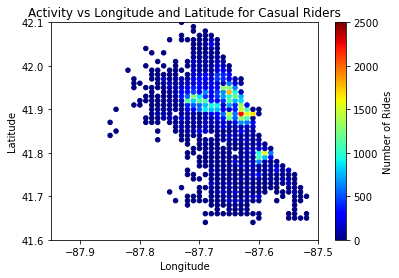

In [13]:
fig, ax = plt.subplots()
ltmcombine[(ltmcombine.member_casual=="casual") & (ltmcombine.station=="Undocked")].plot(kind="scatter", x="lng",y="lat",c="Number of Rides",cmap=plt.get_cmap("jet"),colorbar=True,vmin=0,vmax=2500,ax=ax)
plt.axis([-87.95,-87.5,41.6,42.1])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Activity vs Longitude and Latitude for Casual Riders")

Text(0.5, 1.0, 'Activity vs Longitude and Latitude for Annual Riders')

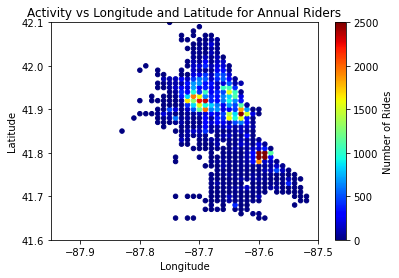

In [14]:
fig, ax = plt.subplots()
ltmcombine[(ltmcombine.member_casual=="member") & (ltmcombine.station=="Undocked")].plot(kind="scatter", x="lng",y="lat",c="Number of Rides",cmap=plt.get_cmap("jet"),colorbar=True,vmin=0,vmax=2500,ax =ax)
plt.axis([-87.95,-87.5,41.6,42.1])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Activity vs Longitude and Latitude for Annual Riders")


The above figures illustrate that the general behaviour of annual vs casual riders are mostly the same as activity is greatest in similar locations, therefore no substantial differences are observed. However, regions that will allow marketing strategy to have the greatest exposure to casual riders are identified and efforts should be focused on these areas.

A better way to differentiate behaviour between membership types is trip duration.

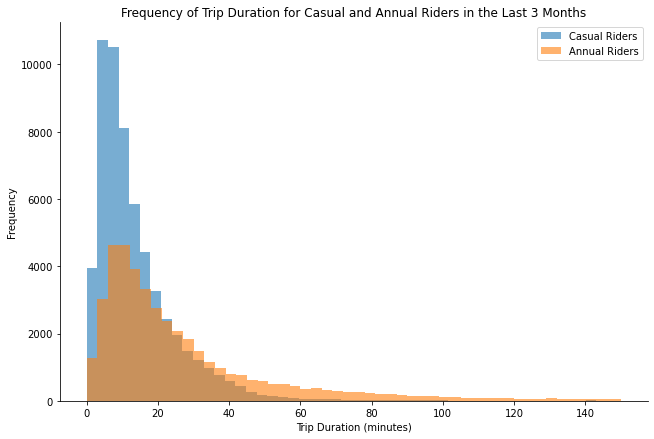

In [15]:
g = sns.FacetGrid(temp[temp["started_at"]>pd.Timestamp(year=2021,month=2,day=1)].sample(100000),hue="member_casual",height=6,aspect=1.5,legend_out=True)
g = g.map(plt.hist,"trip_duration",bins=50,alpha=.6)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Frequency")
plt.title("Frequency of Trip Duration for Casual and Annual Riders in the Last 3 Months")
plt.legend(["Casual Riders","Annual Riders"])

The duration of trips is right skewed for both casual and annual riders, suggesting that the general population prefer shorter trips. This may be a testament to most casual riders also using the bikes to commute, similar to the behaviour observed in members. The tail of the distribution for the annual rider does not exceed 60mins (apart from limited cases). However, the frequency of trip durations for casual riders above this is much more significant. 

It appears that trip duration is a good differentiator.

It is then asked as to ***why*** annual riders prefer shorter trip durations to the casual rider and perhaps ***why*** casual riders occasionally have trip durations exceeding 60minutes duration. It is hypothesised that this is a testament to most annual riders using the bikes for commuting purposes rather than the leisurely activities such as city exploring, tourism and perhaps exercising as seen in casual riders. To test this hypothesis, it is expected that these behaviours would change on a days-of-the-week basis and observations on the behaviour on an hourly basis will allow for distinct periods to be located.

No handles with labels found to put in legend.


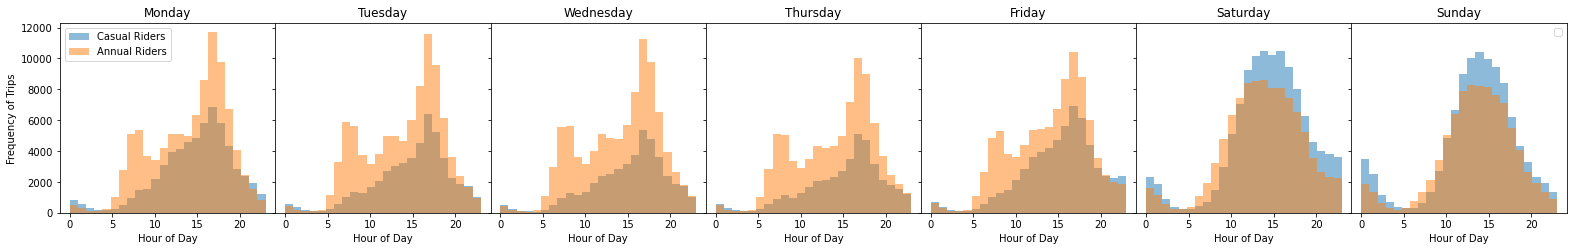

In [16]:
l3m=temp[temp["started_at"]>pd.Timestamp(year=2021,month=2,day=1)]
fig, ax = plt.subplots(nrows=1,ncols=7,figsize=(27,3.5),sharey=True)
weekdays = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
for i, j in zip(ax,weekdays):
    i.hist(x=l3m[(l3m["member_casual"]=="casual") & (l3m["day_of_week"]==j)]["started_at_hour"],alpha=0.5,bins=24)
    i.hist(x=l3m[(l3m["member_casual"]=="member") & (l3m["day_of_week"]==j)]["started_at_hour"],alpha=0.5,bins=24)
    i.set_title(j)
    i.set_xlabel("Hour of Day")
    if j == "Monday":
        i.set_ylabel("Frequency of Trips")
        i.legend(["Casual Riders","Annual Riders"])
plt.subplots_adjust(wspace=0)
plt.legend()

One can see that the behaviour of casual vs annual riders is quite clearly defined. On weekdays (Mon-Fri), there is a repeated pattern; the number of annual riders peak to about 5-6k between the periods of 05:00-10:00, indicating the commuting characteristics of annual riders. Although this aspect is visible on the casual riders, it is not as distinct as the annual riders. This shows some interest from casual riders but since this isn't significant, it may actually indicate that casual riders are unaware of the annual riders scheme.

The commuting characteristic is also observed in the latter part of the afternoon where spikes are observed on both casual and annual riders between 15:00-20:00.

Another particularly interesting aspect is the weekend (Friday evening-Sunday Evening) behaviour which signifcantly varies when compared to the weekday behaviours. 

-Firstly, a cool observation is the signifcant interest observed in the late evening periods (20:00 onwards), likely due to nights out. This is irrelevant to the analysis but intersting nontheless.

-Secondly, there appears to be a steady bell shaped curve, which indicates that there isnt a significant flucatuations in demand for the bikes. It is hypothesised that the structure of this curve could be influenced by season.

-Finally, the increase for casual riders between weekend and weekdays is large which could be an indication for tourists entering the city or more casual riders using the bikes for leisurely activities. However, there is a visible drop for annual riders in weekends when compared to weekdays which could suggest 



In [17]:
timed_groupby=temp[["started_at_weekday","day_of_week","started_at_hour","member_casual","trip_duration"]].groupby(["started_at_weekday","day_of_week","started_at_hour","member_casual"]).aggregate(['mean']).reset_index()

timed_groupby.columns=timed_groupby.columns.droplevel(1)
timed_groupby.drop(columns="started_at_weekday", inplace=True)
timed_groupby.set_axis(["day_of_week","started_at_hour",	"member_casual","ave_trip_duration"],axis=1,inplace=True)

timed_groupby

,day_of_week,started_at_hour,member_casual,ave_trip_duration
0,Monday,0,casual,34.832447
1,Monday,0,member,12.136331
2,Monday,1,casual,34.170011
3,Monday,1,member,12.064655
4,Monday,2,casual,34.838776
...,...,...,...,...
331,Sunday,21,member,13.319558
332,Sunday,22,casual,31.152489
333,Sunday,22,member,13.085154
334,Sunday,23,casual,34.318219


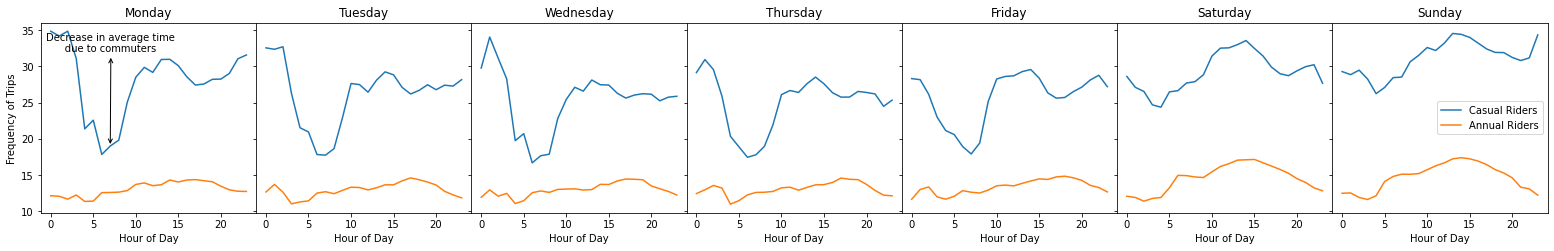

In [18]:
fig, ax = plt.subplots(nrows=1,ncols=7,figsize=(27,3.5),sharey=True)
for i, j in zip(ax,weekdays):
    i.plot(timed_groupby[(timed_groupby["member_casual"]=="casual") & (timed_groupby["day_of_week"]==j)]["started_at_hour"],
                            timed_groupby[(timed_groupby["member_casual"]=="casual") & (timed_groupby["day_of_week"]==j)]["ave_trip_duration"])
    i.plot(timed_groupby[(timed_groupby["member_casual"]=="member") & (timed_groupby["day_of_week"]==j)]["started_at_hour"],
                            timed_groupby[(timed_groupby["member_casual"]=="member") & (timed_groupby["day_of_week"]==j)]["ave_trip_duration"])
    i.set_title(j)
    i.set_xlabel("Hour of Day")
    if j == "Monday":
        i.set_ylabel("Frequency of Trips")
        i.annotate("Decrease in average time\n      due to commuters",xy=[7,19],xytext=[-0.5,32],arrowprops={"arrowstyle":'<->'})
    elif j == "Sunday":
        i.legend(["Casual Riders","Annual Riders"])
plt.subplots_adjust(wspace=0)


Finally, an analysis of the average trip durations produce some interesting findings.

-On average, casual riders have a longer trip duration suggesting leisurely activities.

-The average trip duration increases from weekday to weekend for both casual and annual riders

-The drop in average trip duration between the period of 04:00-09:00 for casual riders suggest that there is an interest for using the bikes for commuting. 

## Act

### Conclusions and Recommendations
1. 42% of rides in the past 3 months have been completed by casual riders, indicating that there is a potential to grow the number of annual riders. 

2. There is little to no difference in the activity observed at various locations between casual and annual riders. However, the top 3 locations with the most activity observed for casual riders are "Streeter Dr & Grand Ave", "Lake Shore Dr & Monroe St" and "Millenium Park". Focusing efforts on these stations and the locations indicated in the lat vs long map are likely to have the highest exposure and thus conversion.

3. There is evidence for a lack of awareness for casual riders on the annual riding program. A strategy focused on this aspect would likely be effective.

4. Not enough data is available to conduct a thorough profiling of casual and annual riders. Particularly, by using various information such as age, sex and distinct rider indexing will allow for a greater distinction in how behaviour differs and how to better focus the marketing strategy.